# Project: Wrangle and Analyze Data

## Table on Contents
- [Introdution](#intro)
- [What is included in this project](#included)
- [Gathering](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Store](#store)
- [Analyzing Data](#analyzing)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction
> The dataset that I  will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs).WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

<a id='included'></a>
## What is included in this project
>- **packages (libraries) use**
>    - pandas
>    - NumPy
>    - requests
>    - tweepy
>    - json
>    - os
>    - matplotlib
>    - seaborn
>- **Data Wrangling**
>    - gathering the data
>    - assess 
>    - clean
>    - store master data(melt, merge)
>- **Data anlyzing and visualizing**
>    - Three or more insight conclusions
>    - Draw specific visualizing for supporting my insight

In [1]:
# library import for this project
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import seaborn as sns
from timeit import default_timer as timer
import os 
import matplotlib.pyplot as plt
from scipy import stats

<a id='gather'></a>
## Gathering
> 1. The WeRateDogs Twitter archive file: Download this file `twitter_archive_enhanced.csv` manually by clicking the [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) 
> 2. The tweet image predictions file : The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. downloaded programmatically using the Requests library and the following URL: `https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv`
> 3. Additional Data via the Twitter API: Download programmatically additional information about retweet count and favorite count using Tweep library

### Step1. twitter-archive-enhanced data import(Local file)
downloaded file from the internet manually as opened into a pandas DataFrame.

In [2]:
# The WeRateDogs Twitter archive data load
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Step2. Image Prediction Data gather using URL [image-predictions](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
downloaded file from the internet programmatically as opened into a pandas DataFrame.

In [3]:
# Make directory if it doesn't already exist
folder_name = 'image_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# set url and response
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
## save the to file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [4]:
# load impage predictions using pandas
image_pred = pd.read_csv('./image_pred/image-predictions.tsv', sep='\t')

### Step3. Additional Data via the Twitter API
>- Create an API object that we can use to gather Twitter data.
>- Tweet data is stored in `JSON format` by Twitter. Getting tweet JSON data via tweet ID using Tweepy is described well in this [StackOverflow answer](https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id). 
>- Also, note that the tweets corresponding to a few tweet IDs in the archive may have been deleted. [Try-except blocks](https://wiki.python.org/moin/HandlingExceptions) may come in handy.

In [16]:
#Twitter account and Twitter app set up
#this code is provided by Udacity 'twitter-api.py'file 

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [12]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
15

Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
18

Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
20

Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
23

In [6]:
# extract only certain additioal data for analysis 
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [7]:
tweeter_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

<a id='assess'></a>
## Assess

###  Assess its quality and tidiness,
####  Two types of assessment are used:
 > - **Visual assessment**: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
 > - **Programmatic assessment**: pandas' functions and/or methods are used to assess the data.

#### `Quality`: in [quality](https://www.informit.com/articles/article.aspx?p=399325&seqNum=3) data
>- Completeness
>- Validity
>- Accuracy
>- Consistency

#### `Tidiness`: In [tidy](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) data
>- Each variable forms a column.
>- Each observation forms a row.
>- Each type of observational unit forms a table.



### step1. Visual assessment

#### Summay of Visual assessment
#### **`twitter_archive table`**
**Quality**
 - missing value columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` ,`retweeted_status_timestamp`
 - `floofer` column name is wrong. it should be spelled `floof`
 - dog without name: some dog names are not a real real name, some names are 'a', 'an' instead of 'None'
**Tidiness** 
 - `doggo`, `floofer`, `pupper`, `puppo` columns should be shown just a columns.

#### **`image_pred table`**
**Quality**
- the type of dog: columns in `p1`, `p2` and `p3` had some uppercase and lowercase letters.
- missing data: 2075 instead of 2356 

#### **`tweeter_count table`**
**Quality**
 - missing data: 2331 row instead of 2356
**Tidiness**
 - the `tweeter_archive` and `tweeter_count` should be merged

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**Quality**
 - missing value columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` ,`retweeted_status_timestamp`
 - `floofer` column name is wrong. it should be spelled `floof`
 - dog without name: some dog names are not a real real name, some names are 'a', 'an' instead of 'None'

**Tidiness** 
 - `doggo`, `floofer`, `pupper`, `puppo` columns should be shown just a columns.

#### **`image_pred table`**

In [9]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**Quality**
- the type of dog: columns in `p1`, `p2` and `p3` had some uppercase and lowercase letters.
- missing data: 2075 instead of 2356 

#### **`tweeter_count` table**

In [10]:
tweeter_count

,id_str,retweet_count,favorite_count
0,892420643555336193,7441,35276
1,892177421306343426,5530,30524
2,891815181378084864,3653,22956
3,891689557279858688,7609,38522
4,891327558926688256,8200,36840
5,891087950875897856,2752,18576
6,890971913173991426,1780,10799
7,890729181411237888,16637,59421
8,890609185150312448,3798,25558
9,890240255349198849,6446,29153


**Quality**
 - missing data: 2331 row instead of 2356
**Tidiness**
 - the `tweeter_archive` and `tweeter_count` should be merged

### step2. Programmatic assessment

#### **`twiter_archive table`**

In [11]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- `expanded_urls` column has missing value too(other columns with missing values were recognized in visaul assessment procedure)
- In general, the `tweet_id`,`in_reply_to_status_id`,`in_reply_to_user_id`, `retweeted_status_user_id` should be object not int
- `timestamp`and `retweeted_status_timestamp` should be a datetime64

In [13]:
# check any duplicate id
twitter_archive.duplicated().sum()

0

In [14]:
# unique dog names
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Buddy           7
an              7
Bailey          7
Toby            7
Daisy           7
Jack            6
Koda            6
Scout           6
Rusty           6
Bella           6
Leo             6
Dave            6
Stanley         6
Jax             6
Oscar           6
Milo            6
Sunny           5
             ... 
Siba            1
Karll           1
Tuco            1
Cermet          1
Jarvis          1
Cora            1
Evy             1
Kevon           1
Grady           1
life            1
Gert            1
Baron           1
Gordon          1
Terrenth        1
Margo           1
Lacy            1
Karl            1
Luther          1
incredibly      1
Ralphé          1
Dixie           1
Jarod           1
Strider         1
Stephanus       1
Ruffles   

- There are 957 unique dog names, some dog names are 'None', 'a', 'an . This means there are many missing names

In [15]:
# check unique values and missing values

doggo = twitter_archive.doggo.value_counts()
floofer = twitter_archive.floofer.value_counts()
pupper =  twitter_archive.pupper.value_counts()
puppo =  twitter_archive.puppo.value_counts()
# print results
print(doggo)
print(floofer)
print(pupper)
print(puppo)


None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


- Missing values for dog stages.

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Quality
- Almost denominator is 10, but that are not multiples of 10 need to be checked.

#### **`image_pred table`**

In [18]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Quality
- The tweet_id column should be dtype object instead of int64.

In [19]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
print(image_pred.p1.value_counts())
print(image_pred.p2.value_counts())
print(image_pred.p3.value_counts())

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
teddy                         18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

Quality
- uppercase and lowercase are mixed and need to be changed.

#### **`tweeter_count` table**

In [21]:
tweeter_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id_str            2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


- To merge tables will be smoother, The column id_str should be changed to tweet_id

In [22]:
tweeter_count.describe()

,retweet_count,favorite_count
count,2331.000000,2331.000000
mean,2613.330759,7370.104676
std,4421.333540,11445.720405
min,1.000000,0.000000
25%,528.500000,1280.500000
50%,1221.000000,3199.000000
75%,3033.000000,9021.000000
max,75092.000000,151978.000000


### Summary of Assessing Data

#### **Quality**

#### **`twitter_archive table`**
 - missing value columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` ,`retweeted_status_timestamp`, `expanded_urls`
 - `floofer` column name is wrong. it should be spelled `floof`
 - dog without name: some dog names are not a real real name, some names are 'a', 'an' instead of 'None'
 - Data Type:
    - In general, the `tweet_id`,`in_reply_to_status_id`,`in_reply_to_user_id`, `retweeted_status_user_id` should be object not int
    - `timestamp`and `retweeted_status_timestamp` should be a datetime64
 - incorrect rating_numerator and rating_denominator 1068th, 1662th, 2335th
 - Keep original ratings (no retweets) that have images.
 - not a dog rating rows will be deleted.

#### **`image_pred table`**

- the type of dog: columns in `p1`, `p2` and `p3` had some uppercase and lowercase letters.
- missing data: 2075 instead of 2356 

#### **`tweeter_count table`**

 - missing data: 2331 row instead of 2356


#### **Tidiness**
- `doggo`, `floofer`, `pupper`, `puppo` columns should be shown just a columns.
- the twitter_archive table and tweeter_count and should be merged as this is added data to the other table..
- All three tables will eventually be merged into one.

<a id='clean'></a>
## Clean

In [23]:
# make copy table
archive_clean = twitter_archive.copy()
image_clean = image_pred.copy()
count_clean = tweeter_count.copy()

### Remove retweets

### **`archive table`**

#### Define
Based on info, there are 181 values in retweeted_status_id and retweeted_status_user_id.Find the retweets and replies using the retweeted_status_id,in_reply_to_status_id columns and remove from the archive table.

#### Code

In [24]:
#Delete retweets by filtering the NaN of retweeted_status_user_id
archive_clean =archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

#### Test

In [25]:
archive_clean['retweeted_status_user_id'].value_counts().sum()

0

### Missing values in columns and not using columns for analysis

### **`archive table`**

#### Define
- Remove columns with missing values using dropna() method. 
- use the drop() method to drop source column from table as well

#### Code

In [26]:
# drop missing values columns
archive_clean.dropna(axis = 1,how='any', inplace=True)
# drop sourcee column
archive_clean.drop(columns='source', inplace=True)

#### Test

In [27]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


### Wrong Data Type

### **`archive table`**

#### Define
- change the dtype of column timestamp from object to datetime using pandas to_datetime() function.
-  change the dtype of column tweet_id from int64 to object using the astype() function.

#### Code

In [28]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 186.9+ KB


### **`image table`**

#### Define
-  change the dtype of column tweet_id from int64 to object using the astype() function.

#### Code

In [30]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')

#### Test

In [31]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### **`count table`**

#### Define
-  change the dtype of column id_str from int64 to object using the astype() function.

#### Code

In [32]:
count_clean['id_str'] = count_clean['id_str'].astype('str')

#### Test

In [33]:
count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id_str            2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Change Column Name

### **`archive table`**

#### Define
-  change the column name `floofer` to `floof` using rename fuction

#### Code

In [34]:
archive_clean.rename(columns={'floofer':'floof'}, inplace=True)

#### Test

In [35]:
print(archive_clean.columns)

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floof', 'pupper', 'puppo'],
      dtype='object')


### **`count table`**

#### Define
-  change the column name `id_str` to `tweet_id` using rename fuction

#### Code

In [36]:
count_clean.rename(columns={'id_str':'tweet_id'}, inplace=True)

#### Test

In [37]:
count_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Fixing some of raitng

### **`archive table`**

#### Define
-  using extractall(), query(), contains() function to check for weird rating 
- Doule rating delete using drop fuction and worng rating fixing manually

#### Code

In [38]:
archive_clean.reset_index(inplace=True, drop=True)

In [39]:
archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


In [40]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
42,This is Bella. She hopes her smile made you sm...,5,10
558,"This is Logan, the Chow who lived. He solemnly...",75,10
617,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1510,I've been told there's a slight possibility he...,5,10
1533,Here we have uncovered an entire battalion of ...,26,10


In [41]:
data=[42, 558, 617, 1510, 1522]
for d in data:
        print(archive_clean['text'][d])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS


In [42]:
archive_clean.iloc[42, 3] = 13.5
archive_clean.iloc[558, 3] = 9.75
archive_clean.iloc[617, 3] = 11.27
archive_clean.iloc[1510, 3] = 9.5
archive_clean.iloc[1522, 3] = 4

In [43]:
extract_table = archive_clean.text.str.extractall(r"(\d+\d*\/\d+)")
extract_table.head(20)

,,0
,match,
0,0,13/10
1,0,13/10
2,0,12/10
3,0,13/10
4,0,12/10
5,0,13/10
6,0,13/10
7,0,13/10
8,0,13/10


In [44]:
# filter match 1
match1= extract_table.query('match == 1')
match1.head()

,,0
,match,
52,1,13/10
263,1,13/10
619,1,11/10
832,1,7/10
890,1,14/10


In [45]:
match1.index.labels

FrozenList([[52, 263, 619, 832, 890, 987, 1024, 1044, 1180, 1280, 1286, 1329, 1346, 1359, 1483, 1616, 1653, 1718, 1722, 1791, 1831, 1885, 1934, 1998, 2037, 2082, 2091, 2117, 2125, 2154], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [46]:
archive_clean.iloc[[52, 263, 619, 832, 890, 987, 1024, 1044, 1180, 1280, 1286, 
                    1329, 1346, 1359, 1483, 1616, 1653, 1718, 1722, 1791, 1831, 
                    1885, 1934, 1998, 2037, 2082, 2091, 2117, 2125, 2154], [2,3,4,5]]

,text,rating_numerator,rating_denominator,name
52,@roushfenway These are good dogs but 17/10 is ...,17.0,10,None
263,@jonnysun @Lin_Manuel ok jomny I know you're e...,960.0,0,None
619,"""Yep... just as I suspected. You're not flossi...",12.0,10,None
832,This is Bookstore and Seaweed. Bookstore is ti...,10.0,10,Bookstore
890,"After so many requests, this is Bretagne. She ...",9.0,11,None
987,Happy 4/20 from the squad! 13/10 for all https...,4.0,20,None
1024,This is Bluebert. He just saw that both #Final...,50.0,50,Bluebert
1044,Meet Travis and Flurp. Travis is pretty chill ...,10.0,10,Travis
1180,This is Socks. That water pup w the super legs...,9.0,10,Socks
1280,This may be the greatest video I've ever been ...,4.0,10,None


In [47]:
data=[52, 263, 619, 832, 890, 987, 1024, 1044, 1180, 1280, 1286, 
                    1329, 1346, 1359, 1483, 1616, 1653, 1718, 1722, 1791, 1831, 
                    1885, 1934, 1998, 2037, 2082, 2091, 2117, 2125, 2154]
for d in data:
        print(archive_clean['text'][d])


@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
"Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10
get it together Flurp https://t.co/Akzl5ynMmE
This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that.

In [48]:
double_list = [619, 832, 1044, 1329, 1359, 1616, 1653, 1722 ,1934 ]
error_list = [236, 890,987, 1024, 1280, 1483 ,2154]

In [49]:
# rating error rating to fix 13/10
archive_clean.iloc[236, 3] = 13
archive_clean.iloc[236, 4] = 10

# rating error rating to fix 14/10
archive_clean.iloc[890, 3] = 14
archive_clean.iloc[890, 4] = 10

# rating error rating to fix 13/10
archive_clean.iloc[987, 3] = 13
archive_clean.iloc[987, 4] = 10

# rating error rating to fix 13/10
archive_clean.iloc[1024, 3] = 13
archive_clean.iloc[1024, 4] = 10

# rating error rating to fix 13/10

archive_clean.iloc[1280, 3] = 13
archive_clean.iloc[1280, 4] = 10

# rating error rating to fix 10/10

archive_clean.iloc[1483, 3] = 10
archive_clean.iloc[1483, 4] = 10

# rating error rating to fix 9/10

archive_clean.iloc[2154, 3] = 10
archive_clean.iloc[2154, 4] = 10

In [50]:
# Drop Double 
archive_clean.drop(axis='index', index=double_list, inplace=True)

#### Test

In [51]:
archive_clean.iloc[[42, 558, 617, 1510, 1522,236, 890,987, 1024, 1280, 1483 ,2154],[2,3,4]]

,text,rating_numerator,rating_denominator
42,This is Bella. She hopes her smile made you sm...,13.50,10
558,"This is Logan, the Chow who lived. He solemnly...",9.75,10
617,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1515,Meet Sarge. His parents signed him up for danc...,11.00,10
1527,This guy's dog broke. So sad. 9/10 would still...,9.00,10
236,Say hello to Maddie and Gunner. They are consi...,13.00,10
892,This is Chase. He's in a predicament. 9/10 hel...,9.00,10
989,This is Panda. He's happy af. 11/10 https://t....,11.00,10
1026,Here's a super majestic doggo and a sunset 11/...,11.00,10
1283,This is Archie. He's a Bisquick Taj Mapaw. Too...,10.00,10


In [52]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id              2166 non-null object
timestamp             2166 non-null datetime64[ns]
text                  2166 non-null object
rating_numerator      2166 non-null float64
rating_denominator    2166 non-null int64
name                  2166 non-null object
doggo                 2166 non-null object
floof                 2166 non-null object
pupper                2166 non-null object
puppo                 2166 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 186.1+ KB


In [53]:
archive_clean.iloc[618:620]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
618,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,3.0,10,Wesley,None,None,None,None
620,777621514455814149,2016-09-18 21:33:11,This is Derek. You can't look at him and not s...,12.0,10,Derek,None,None,None,None


###  Erroneous datatypes (doggo, floofer, pupper and puppo columns)

### **`archive table`**

#### Define
- one variable in four columns (doggo, floofer, pupper, and puppo) using melt fuction

#### Code

In [54]:
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name'],var_name='dogs', value_name='dogs_stage')


In [55]:
archive_clean = archive_clean.drop('dogs', 1)

In [56]:
archive_clean = archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id',keep='last')
                            

#### Test

In [57]:
archive_clean['dogs_stage'].value_counts()

None       1822
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

In [58]:
archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
2087,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10.0,10,None,None
2086,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10,None,None
2085,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11.0,10,Cupcake,None
2084,667455448082227200,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,7.0,10,Reese,None
2083,667470559035432960,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,11.0,10,a,None


### Dog Breeds Consistency

### **`archive table`**

#### Define
- the p1, p2, and p3 columns are converting all the names to lowercase letter using str.lower() fuction

#### Code

In [59]:
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

#### Test

In [60]:
image_clean.p1.head(), image_clean.p2.head(), image_clean.p3.head()

(0    welsh_springer_spaniel
 1                   redbone
 2           german_shepherd
 3       rhodesian_ridgeback
 4        miniature_pinscher
 Name: p1, dtype: object, 0                collie
 1    miniature_pinscher
 2              malinois
 3               redbone
 4            rottweiler
 Name: p2, dtype: object, 0      shetland_sheepdog
 1    rhodesian_ridgeback
 2             bloodhound
 3     miniature_pinscher
 4               doberman
 Name: p3, dtype: object)

### Dog Type

#### Define
create 1 column for image prediction and 1 column for confidence level.

#### Code

In [61]:
dog_type = []
confidence_list = []
#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_clean):
    if image_clean['p1'] == True:
        dog_type.append(image_clean['p1_dog'])
        confidence_list.append(image_clean['p1_conf'])
    elif image_clean['p2_dog'] == True:
        dog_type.append(image_clean['p2'])
        confidence_list.append(image_clean['p2_conf'])
    elif image_clean['p3_dog'] == True:
        dog_type.append(image_clean['p3'])
        confidence_list.append(image_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_clean.apply(image, axis=1)

#create new columns
image_clean['dog_type'] = dog_type
image_clean['confidence_list'] = confidence_list

#### Test

In [62]:
#drop rows that has prediction_list 'error'
image_clean = image_clean[image_clean['dog_type'] != 'Error']

In [63]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1708 non-null object
jpg_url            1708 non-null object
img_num            1708 non-null int64
p1                 1708 non-null object
p1_conf            1708 non-null float64
p1_dog             1708 non-null bool
p2                 1708 non-null object
p2_conf            1708 non-null float64
p2_dog             1708 non-null bool
p3                 1708 non-null object
p3_conf            1708 non-null float64
p3_dog             1708 non-null bool
dog_type           1708 non-null object
confidence_list    1708 non-null object
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 165.1+ KB


### Merge(archive and count_clean Table)

#### Define
- Take both the archive_clean and count_clean tables and merge into one table using the join() method on the columns tweet_id.

#### Code

In [64]:
df_merge1 = archive_clean.join(count_clean.set_index('tweet_id'), on='tweet_id')

#### Test

In [65]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 2087 to 7052
Data columns (total 9 columns):
tweet_id              2166 non-null object
timestamp             2166 non-null datetime64[ns]
text                  2166 non-null object
rating_numerator      2166 non-null float64
rating_denominator    2166 non-null int64
name                  2166 non-null object
dogs_stage            2166 non-null object
retweet_count         2159 non-null float64
favorite_count        2159 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 169.2+ KB


### Merge(df_merge 1 and image_clean table)

#### Define 
- Take the newly df_merge1 table and combine with the image_clean table using the same join() method on the tweet_id column.

#### Code

In [66]:
master = df_merge1.join(image_clean.set_index('tweet_id'), on='tweet_id')

#### Test

In [67]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 2087 to 7052
Data columns (total 22 columns):
tweet_id              2166 non-null object
timestamp             2166 non-null datetime64[ns]
text                  2166 non-null object
rating_numerator      2166 non-null float64
rating_denominator    2166 non-null int64
name                  2166 non-null object
dogs_stage            2166 non-null object
retweet_count         2159 non-null float64
favorite_count        2159 non-null float64
jpg_url               1634 non-null object
img_num               1634 non-null float64
p1                    1634 non-null object
p1_conf               1634 non-null float64
p1_dog                1634 non-null object
p2                    1634 non-null object
p2_conf               1634 non-null float64
p2_dog                1634 non-null object
p3                    1634 non-null object
p3_conf               1634 non-null float64
p3_dog                1634 non-null object
dog_type        

### Clean Master Data

#### Define
- removing missing rows from the master data

#### Code

In [68]:
master_clean = master.copy()

In [69]:
drop_index = master_clean[pd.isnull(master_clean['jpg_url'])].index
drop_index2 = master_clean[pd.isnull(master_clean['retweet_count'])].index
drop_index, drop_index2

(Int64Index([2087, 2086, 2082, 2081, 2071, 2070, 2068, 2066, 2060, 2059,
             ...
             5628, 5642, 5595, 5591, 5050, 6060, 5599, 7062, 7073, 7094],
            dtype='int64', length=532),
 Int64Index([93, 3708, 2772, 2383, 2418, 2925, 305], dtype='int64'))

In [70]:
# Remove null rows
master_clean.drop(index=drop_index, inplace=True)
master_clean.drop(index=drop_index2, inplace=True)

#### Test

In [71]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 2085 to 7052
Data columns (total 22 columns):
tweet_id              1627 non-null object
timestamp             1627 non-null datetime64[ns]
text                  1627 non-null object
rating_numerator      1627 non-null float64
rating_denominator    1627 non-null int64
name                  1627 non-null object
dogs_stage            1627 non-null object
retweet_count         1627 non-null float64
favorite_count        1627 non-null float64
jpg_url               1627 non-null object
img_num               1627 non-null float64
p1                    1627 non-null object
p1_conf               1627 non-null float64
p1_dog                1627 non-null object
p2                    1627 non-null object
p2_conf               1627 non-null float64
p2_dog                1627 non-null object
p3                    1627 non-null object
p3_conf               1627 non-null float64
p3_dog                1627 non-null object
dog_type        

<a id='store'></a>
## Store Master Data

In [72]:
master_clean.to_csv('master.csv', index=False)

<a id='analyzing'></a>
## Analyzing Data

In [73]:
master_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
286,832273440279240704,2017-02-16 17:00:25,Say hello to Smiley. He's a blind therapy dogg...,14.0,10,Smiley,doggo,2270.0,11132.0,https://pbs.twimg.com/ext_tw_video_thumb/83227...,...,0.134081,True,ice_bear,0.051928,False,pug,0.044311,True,pug,0.0443109
5794,683834909291606017,2016-01-04 02:18:42,Here we see a faulty pupper. Might need to rep...,9.0,10,None,pupper,1076.0,2544.0,https://pbs.twimg.com/ext_tw_video_thumb/68383...,...,0.738449,True,toy_poodle,0.102992,True,samoyed,0.023247,True,toy_poodle,0.102992
3214,713761197720473600,2016-03-26 16:15:05,This is Piper. She would really like that tenn...,12.0,10,Piper,None,1309.0,4697.0,https://pbs.twimg.com/media/CefKBOuWIAAIlKD.jpg,...,0.797936,True,english_springer,0.044718,True,welsh_springer_spaniel,0.037911,True,english_springer,0.0447182
2704,790277117346975746,2016-10-23 19:42:02,This is Bruce. He never backs down from a chal...,11.0,10,Bruce,None,3138.0,12474.0,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,...,0.427742,True,great_dane,0.190503,True,curly-coated_retriever,0.146427,True,great_dane,0.190503
2435,834458053273591808,2017-02-22 17:41:18,Meet Chester (bottom) &amp; Harold (top). They...,12.0,10,Chester,None,1624.0,9440.0,https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg,...,0.468619,True,whippet,0.177531,True,redbone,0.106552,True,whippet,0.177531


In [74]:
master_clean.sort_values(by='timestamp', inplace=True) 

In [75]:
master_clean = master_clean.set_index('timestamp')

### 1. Tetweet and favorite count time trend

In [76]:
# set these variables so the plotting code would be cleaner.
retweet_resamp = master_clean['retweet_count'].resample('1w').mean()
favorite_resamp = master_clean['favorite_count'].resample('1w').mean()

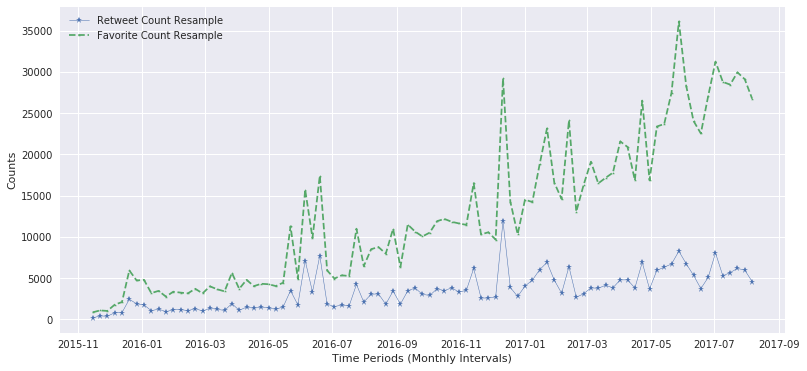

In [77]:
# plotting the resample of weekling favorite and retweet counts to show a smoother display over time.
sns.set(rc={'figure.figsize':(13, 6)})
fig, ax = plt.subplots()
ax.plot(retweet_resamp, marker='*', linestyle='-', linewidth=0.5, label='Retweet Count Resample')
ax.plot(favorite_resamp, marker='*', markersize=3, linestyle='--', label='Favorite Count Resample')
ax.set_ylabel('Counts')
ax.set_xlabel('Time Periods (Monthly Intervals)')
ax.legend();

- Time series code refer to https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

- The above line chart was used by resampling the average counts of data, in weekly intervals, much like a moving average, which helps smooth out the graph and improve visibility of the trends.
- As you can see chart retweet and favorite count are increasing over time.especially there are 3 spikes at specific times of year, those being, the middle of spring into summer, and then the Christmas/Holiday time. I think It is most likely due to people with dogs are more active in the warmer months, posting cute things their dog is doing outside. 

### 2. What is Common dog in data set

In [78]:
master_clean.dog_type.value_counts()

labrador_retriever                102
golden_retriever                   90
cardigan                           75
chihuahua                          49
pomeranian                         45
toy_poodle                         44
chesapeake_bay_retriever           41
french_bulldog                     41
miniature_poodle                   35
siberian_husky                     35
cocker_spaniel                     34
beagle                             32
pembroke                           31
eskimo_dog                         29
kuvasz                             28
collie                             28
chow                               26
pug                                26
italian_greyhound                  22
american_staffordshire_terrier     22
pekinese                           22
toy_terrier                        21
malinois                           21
miniature_pinscher                 20
samoyed                            20
norwegian_elkhound                 20
boston_bull 

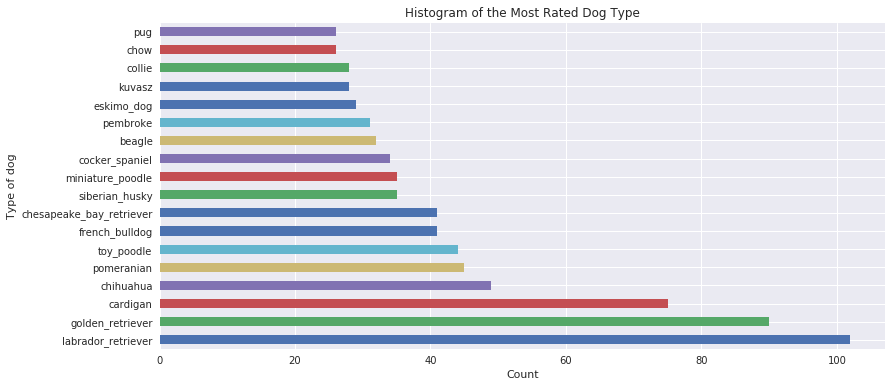

In [79]:
df_dog_type = master_clean.groupby('dog_type').filter(lambda x: len(x) > 22)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 

> - I looked at the most common dog breeds with more than 22 counts.
> - We see above chahrt, labrador retriever is the most common dog in this dataset.second is golden_retriever. the next four cardigan, chihuahua, pomeranian, toy_poodle.
> - But we are relying on the image predition code to inform us dog breeds, be careful when drawing conclusions.

### 3. Favorites vs Retweets 

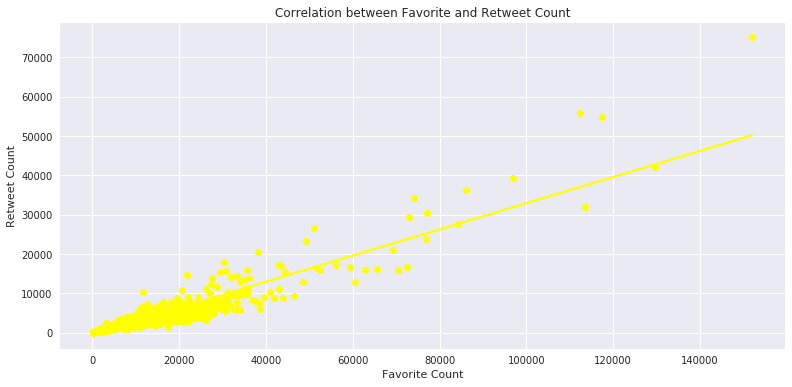

In [80]:
x, y = master_clean.favorite_count, master_clean.retweet_count,
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope*x+intercept
plt.plot(x, y, 'o', x, line, color='yellow')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Correlation between Favorite and Retweet Count');

> - Our initial plot that most of the tweets have less than 20,000 favorites and less than 30,000 favorites. 
> - There seems to be a linear relationship between the two variables

In [81]:
master_clean

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-11-15 22:32:08,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,8.0,10,None,None,445.0,2350.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,...,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,collie,0.156665
2015-11-15 23:05:30,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.0,10,a,None,41.0,118.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,miniature_pinscher,0.0741917
2015-11-15 23:21:54,666033412701032449,Here is a very happy pup. Big fan of well-main...,9.0,10,a,None,39.0,108.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,malinois,0.138584
2015-11-16 00:04:52,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6.0,10,a,None,123.0,263.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,redbone,0.360687
2015-11-16 00:24:50,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5.0,10,None,None,39.0,95.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,...,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,rottweiler,0.243682
2015-11-16 00:30:50,666050758794694657,This is a truly beautiful English Wilson Staff...,10.0,10,a,None,51.0,119.0,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1.0,...,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,english_springer,0.263788
2015-11-16 00:49:46,666055525042405380,Here is a Siberian heavily armored polar bear ...,10.0,10,a,None,213.0,402.0,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1.0,...,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,tibetan_mastiff,0.0582794
2015-11-16 00:55:59,666057090499244032,My oh my. This is a rare blond Canadian terrie...,9.0,10,a,None,119.0,263.0,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1.0,...,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.00795896
2015-11-16 01:01:59,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,8.0,10,the,None,51.0,103.0,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1.0,...,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,komondor,0.192305


### 4. Popularity Dog Stage

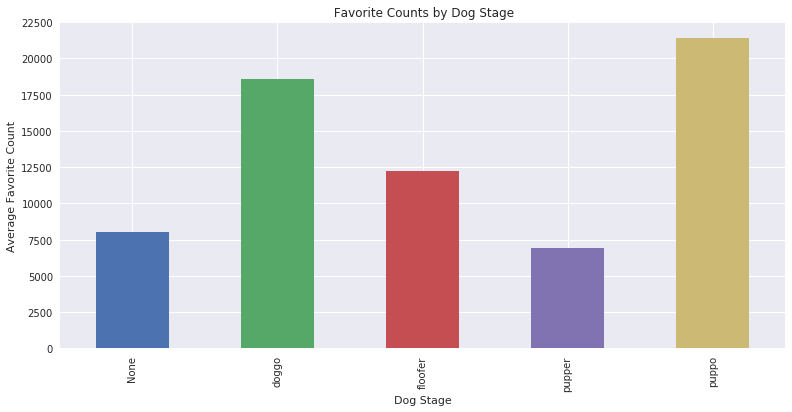

In [82]:
df_dog_stage = master_clean.groupby('dogs_stage')
df_dog_stage['favorite_count'].mean().plot(kind = 'bar')
plt.title(' Favorite Counts by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Average Favorite Count');

> - The dog stage that received the most likes puppo. People seem to think young dogs are cuter
> - However, this data contains data for which dog stages are not classified

<a id='conclusions'></a>
## Conclusions

**I explored and analyzed the data set. The insights I have seen with interest is as follows.**

### Insight 1. Tetweet and favorite count time trend
- The above line chart was used by resampling the average counts of data, in weekly intervals, much like a moving average, which helps smooth out the graph and improve visibility of the trends.
- As you can see chart retweet and favorite count are increasing over time.especially there are 3 spikes at specific times of year, those being, the middle of spring into summer, and then the Christmas/Holiday time. I think It is most likely due to people with dogs are more active in the warmer months, posting cute things their dog is doing outside. 

### Insight 2. What is Common dog in data set
- I looked at the most common dog breeds with more than 22 counts.
- We see above chahrt, labrador retriever is the most common dog in this dataset.second is golden_retriever. the next four cardigan, chihuahua, pomeranian, toy_poodle.
- But we are relying on the image predition code to inform us dog breeds, be careful when drawing conclusions.

### Insight 3.  Favorites vs Retweets relationship
- Our initial plot that most of the tweets have less than 20,000 favorites and less than 30,000 favorites. 
- There seems to be a linear relationship between the two variables

### Insight 4. Popularity Dog Stage
- The dog stage that received the most likes puppo. People seem to think young dogs are cuter
- However, this data contains data for which dog stages are not classified

### Limitaions: There are a couple of limitations with our data

- we are relying on the image predition code to inform us dog breeds, be careful when drawing conclusions.
- The data set contains data for which dog stages are not classified
- Data contains time period is from 2015-11-15 to 2017-08-01 and Some data was missing during the merge process.